# Machine Learning Linear Regression Model 2 
> ## Maternal Mortality Analysis without Race
***

### Importing Dependencies

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd

### Read the CSV and Perform Basic Data Cleaning

In [2]:
# Reading the csv file into a pandas DataFrame
mmr_without_race = pd.read_csv('../Resources/non_race_data.csv')
mmr_without_race

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2014,Wisconsin,US.WI,WI,43.784440,-88.787868,16.0,67161.0,23.82,2898057.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2015,Wisconsin,US.WI,WI,43.784440,-88.787868,11.0,67041.0,16.41,2903737.0,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2016,Wisconsin,US.WI,WI,43.784440,-88.787868,15.0,66615.0,22.52,2905282.0,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2017,Wisconsin,US.WI,WI,43.784440,-88.787868,12.0,64975.0,18.47,2912745.0,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [3]:
# Checking dataframe rows
mmr_without_race.count()

year                        308
state                       308
id                          308
state_code                  308
latitude                    308
longitude                   308
deaths                      308
births                      308
maternal_mortality_ratio    308
population                  308
employer                    308
non_group                   308
medicaid                    308
medicare                    308
military                    308
uninsured                   308
air_pollution_val           308
cancer_death_val            308
cardio_death_val            308
child_pov_val               308
choles_check_val            308
dent_vis_val                308
dentists_val                308
diabetes_val                308
drug_deaths_val             308
health_stat_fem_val         308
immun_child_val             308
income_ineq_val             308
infant_mort_val             308
infect_dis_val              308
obesity_val                 308
phys_ina

In [4]:
# Checking data types and columns
mmr_without_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      308 non-null    int64  
 1   state                     308 non-null    object 
 2   id                        308 non-null    object 
 3   state_code                308 non-null    object 
 4   latitude                  308 non-null    float64
 5   longitude                 308 non-null    float64
 6   deaths                    308 non-null    float64
 7   births                    308 non-null    float64
 8   maternal_mortality_ratio  308 non-null    float64
 9   population                308 non-null    float64
 10  employer                  308 non-null    float64
 11  non_group                 308 non-null    float64
 12  medicaid                  308 non-null    float64
 13  medicare                  308 non-null    float64
 14  military  

In [5]:
mmr_without_race.columns

Index(['year', 'state', 'id', 'state_code', 'latitude', 'longitude', 'deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val'],
      dtype='object')

In [6]:
# Printing the correlation matrix with `corr()`
mmr_without_race.corr()

,year,latitude,longitude,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
year,1.000000,-0.027653,-0.004793,0.003753,-0.071986,0.193755,-0.023038,0.088274,0.436825,0.432700,...,0.046539,-0.221430,-0.606058,-0.002987,-0.179363,0.378793,-0.125269,-0.656458,0.436571,0.023204
latitude,-0.027653,1.000000,-0.093409,-0.327565,-0.163899,-0.394296,-0.147033,0.718879,-0.155373,0.196342,...,-0.572090,-0.217094,-0.583706,0.653423,0.540649,-0.468779,0.585510,-0.472547,0.460243,-0.612014
longitude,-0.004793,-0.093409,1.000000,-0.035413,-0.208043,0.170854,-0.154017,0.260086,-0.253765,-0.003201,...,0.187744,0.281804,-0.164899,-0.097749,-0.238456,0.133204,-0.263424,-0.124243,0.358423,0.478018
deaths,0.003753,-0.327565,-0.035413,1.000000,0.821868,0.235069,0.789032,-0.268798,0.042867,-0.081354,...,-0.175551,-0.247768,0.395845,-0.085967,0.086018,0.114382,-0.237738,0.048008,-0.050138,0.011313
births,-0.071986,-0.163899,-0.208043,0.821868,1.000000,-0.229183,0.987923,-0.227187,0.094957,0.015316,...,-0.369198,-0.400382,0.311630,0.126885,0.256755,-0.008703,-0.067050,-0.025878,0.026635,-0.210687
maternal_mortality_ratio,0.193755,-0.394296,0.170854,0.235069,-0.229183,1.000000,-0.249864,-0.262488,-0.048984,0.028156,...,0.498445,0.329596,0.122712,-0.496458,-0.488129,0.359987,-0.396286,0.157247,-0.175889,0.472751
population,-0.023038,-0.147033,-0.154017,0.789032,0.987923,-0.249864,1.000000,-0.208207,0.132825,0.069372,...,-0.390039,-0.417872,0.241285,0.159525,0.257701,0.001806,-0.070141,-0.105223,0.094877,-0.211416
employer,0.088274,0.718879,0.260086,-0.268798,-0.227187,-0.262488,-0.208207,1.000000,-0.084822,-0.131332,...,-0.518399,-0.292632,-0.622332,0.627947,0.513107,-0.445105,0.474462,-0.591573,0.515622,-0.411161
non_group,0.436825,-0.155373,-0.253765,0.042867,0.094957,-0.048984,0.132825,-0.084822,1.000000,-0.024795,...,-0.227284,-0.351730,-0.153542,0.144042,0.132474,-0.002229,-0.047133,-0.403596,0.013671,-0.212408
medicaid,0.432700,0.196342,-0.003201,-0.081354,0.015316,0.028156,0.069372,-0.131332,-0.024795,1.000000,...,0.041218,0.014845,-0.533526,0.007717,-0.156394,0.264816,0.019945,-0.312497,0.445830,0.021510


### Ploting Data for Visualization 
***

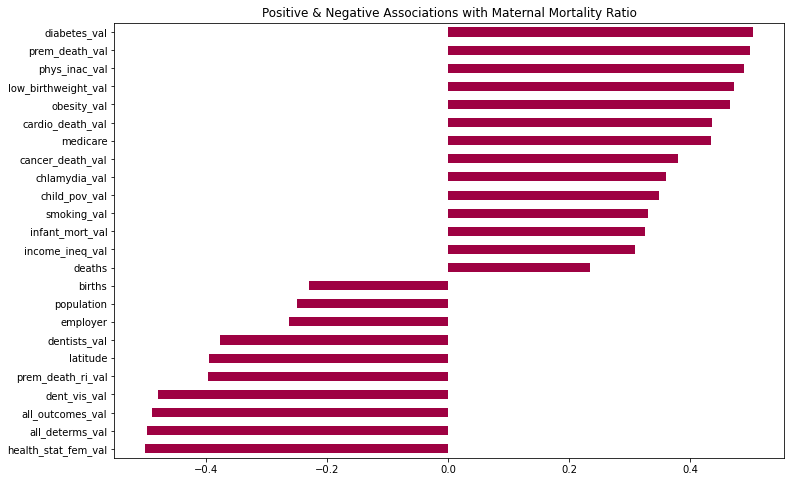

In [7]:
# Importing plotting dependencies
import matplotlib.pyplot as plt
%matplotlib inline

# Using the `corr()` to do initial plotting of the dataframe that have positive and negative association with MMR
y='maternal_mortality_ratio'
corrdf=mmr_without_race.corr()[y].drop(y).sort_values()

# Setting the association to be equal and greated than `>=0.20`
corrdf=corrdf[abs(corrdf)>=0.20]

# Plot 1: barh barplot showing the Positive & Negative Associations with Maternal Mortality Ratio
corrdf.plot(kind='barh',figsize=(12,8),colormap='Spectral')
plt.title("Positive & Negative Associations with Maternal Mortality Ratio")

# Saving plot
plt.savefig("../../static/img/MMR_Non_Race_Association.png")

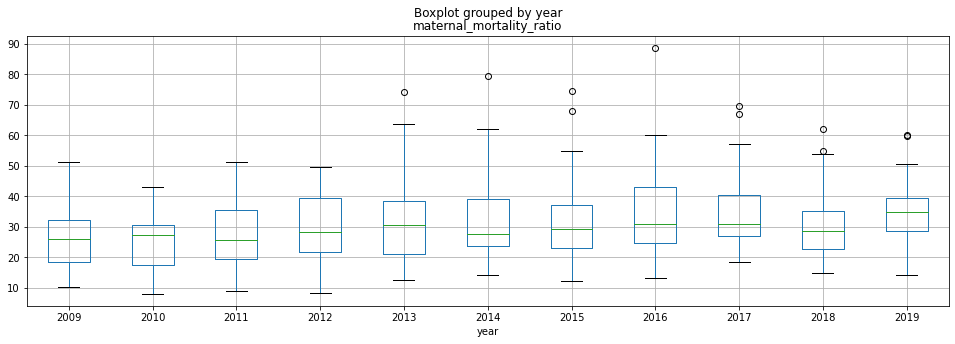

In [8]:
# Plot 2: Boxplot of maternal mortality grouped by year
mmr_without_race.boxplot(by='year', column=['maternal_mortality_ratio'], figsize=(16,5))

# Saving plot
plt.savefig("../../static/img/MMR_Boxplot_by_year.png")

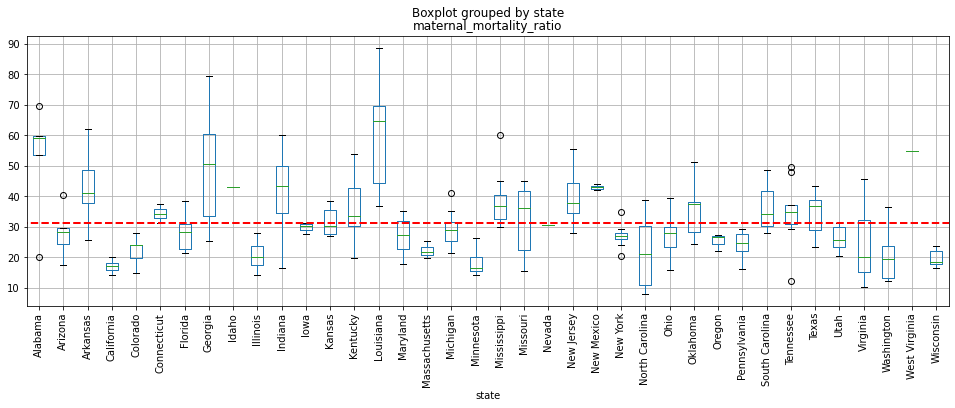

In [9]:
# Plot 3: Boxplot of maternal mortality grouped by state
y = 'maternal_mortality_ratio'

# Grouping boxplot by state
ax = mmr_without_race.boxplot(by='state', column=[y], figsize=(16,5), rot=90)

# Adding horizontal line across the axis
ax.axhline(y=mmr_without_race[y].mean(), xmin=-1, xmax=100, color='r', linestyle='--', lw=2)

# Saving plot
plt.savefig("../../static/img/MMR_Boxplot_by_State.png")

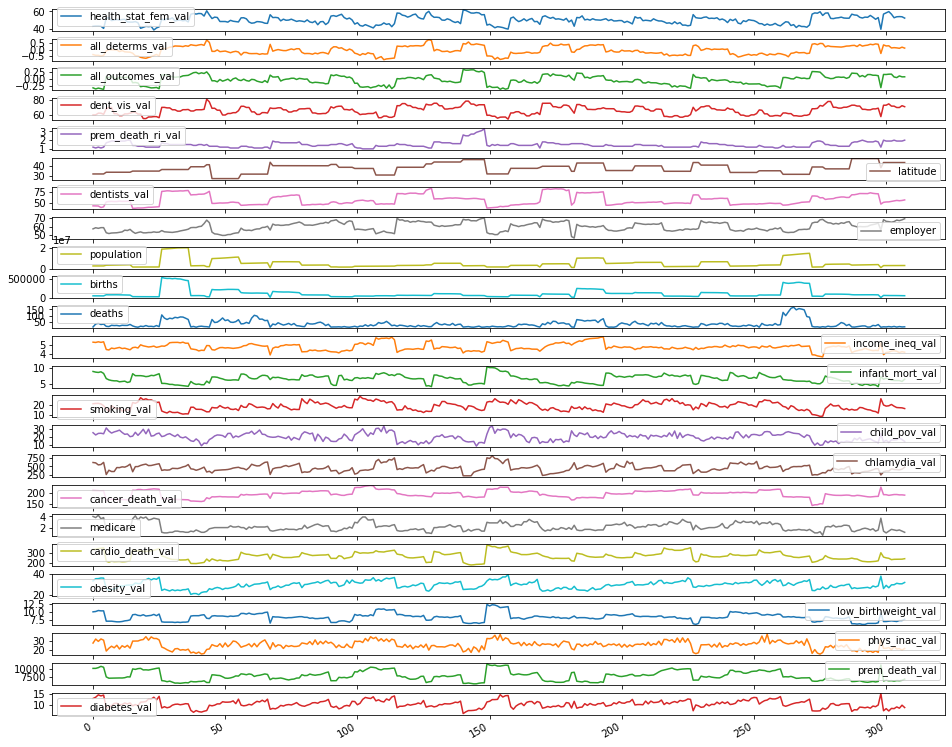

In [10]:
# Plot 4: Creating subplots of the correlation dataframe
corr_df_plots = mmr_without_race[list(corrdf.index)].plot(subplots=True, figsize=(16,14))

# set the spacing between subplots 
plt.subplots_adjust(left=0.125,
                    bottom=0.20, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

<AxesSubplot:xlabel='year'>

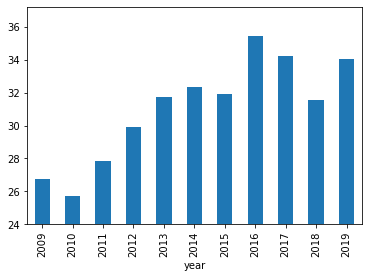

In [11]:
# Plot 5: Barplot of maternal mortality grouped by year
y = 'maternal_mortality_ratio'

# Grouping by year
AVG_MMR_USA = mmr_without_race.groupby('year').mean()[y]

# Plotting barplot of mmr by year
AVG_MMR_USA.plot(kind='bar',ylim=(24))

In [12]:
# Selecting the features from the dataframe that will be the X values
selected_features = mmr_without_race[['deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val']]
selected_features.head()

,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,medicare,military,uninsured,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,12.0,59657.0,20.11,2505795.0,57.4,8.9,13.6,4.0,2.2,13.9,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,35.0,59151.0,59.17,2507714.0,58.7,9.1,13.8,3.8,1.9,12.7,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,41.0,58941.0,69.56,2514911.0,58.0,8.6,13.6,4.2,2.3,13.3,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,31.0,57761.0,53.67,2523756.0,58.8,7.5,13.7,3.6,2.5,13.9,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,35.0,58615.0,59.71,2533668.0,58.8,7.8,13.9,3.8,2.4,13.3,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3


### Creating a Train Test Split
***
We are using `maternal_mortality_ratio` for the y values

In [13]:
# Selecting and assigning the X & y values
y = mmr_without_race['maternal_mortality_ratio'].values.reshape(-1,1)
X = selected_features.drop(columns=['maternal_mortality_ratio', 'deaths','births'], axis=1)

In [14]:
# Print the selecting X & y shapes
print('Shape:', X.shape, y.shape)

Shape: (308, 33) (308, 1)


#### Create a Train Test Split

In [15]:
# Spliting our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.3)

In [16]:
# Checking X_train length
len(X_train)

215

In [17]:
# Checking y_train length
len(y_train)

215

### Linear Regression Baseline Model

In [18]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

# Step 1: Creating a linear regression model
model = LinearRegression()
model

LinearRegression()

In [19]:
# Step 2: Fitting (train) our model to the data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Obtaining the coefficient of determination (R2)
r_sq = model.score(X_train, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.5033823821364489


In [21]:
# Printing the intercept
print('intercept:', model.intercept_)

intercept: [926.76070878]


In [22]:
# Printing the slope
print('slope:', model.coef_)

slope: [[-1.53653277e-06 -8.33409413e+00 -8.81123254e+00 -8.17438476e+00
  -8.10687837e+00 -1.02468911e+01 -8.19624155e+00  3.31705730e-01
  -4.05326787e-02  3.46109409e-02 -3.43361519e-01 -2.29170676e-01
   7.75294661e-02 -4.16252456e-01 -4.92534136e-01 -2.60876770e-01
  -3.22277375e-01 -1.34738418e-01  1.29705860e+01 -1.26782649e+00
   1.38427492e-01  3.72631649e-01  5.03907781e-01  1.82577462e-03
  -1.21635909e+00  4.40782929e-01 -1.09903869e+01  1.37083030e+01
  -3.12532825e-02 -1.24869860e+01 -5.95734266e-01 -6.39764527e-02
   6.86672891e-01]]


In [23]:
# Step 3: Predicting
y_pred = model.predict(X_test)
# print('Predicted response:', y_pred, sep='\n')

array([[2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

## Machine Learning Model 2 : 
***
### Simple Time-Series Forecast of Average Annual Maternal Mortality in USA ##

In [34]:
# Importing ML linear regression dependency
from sklearn.linear_model import LinearRegression

# Selecting and assigning the X and y values
X2 = AVG_MMR_USA.reset_index().year.values.reshape(-1,1)
y2 = AVG_MMR_USA.reset_index()['maternal_mortality_ratio'].values

In [35]:
# Printing the selected X and y shapes
print('Shape:', X2.shape, y2.shape)

Shape: (11, 1) (11,)


In [36]:
# Steps 1 & 2: Creating and Fitting our model to the data
reg_model = LinearRegression().fit(X2, y2)

In [37]:
# Obtaining the coefficient of determination (R2)
r_square = reg_model.score(X2, y2)
print('Coefficient of determination:', r_square)

Coefficient of determination: 0.7392706659392578


### Make predictions for next 10 years

In [63]:
# Setting predictions dictionary to hold variables
predictions=[]

# Creating a for-loop to return predictions from model
for i in range(2009,2031):
    y_values=reg_model.predict(np.array([i]).reshape(1, -1))
    predictions.append(y_values[0])
    
# Printing the predictions
print(f"Maternal Mortality Ratio with the next 10 years:")
predictions

Maternal Mortality Ratio with the next 10 years:


[26.951244769119512,
 27.770550231190327,
 28.589855693261143,
 29.409161155331958,
 30.228466617402773,
 31.04777207947359,
 31.867077541544177,
 32.68638300361499,
 33.50568846568581,
 34.32499392775662,
 35.14429938982744,
 35.96360485189825,
 36.78291031396907,
 37.602215776039884,
 38.42152123811047,
 39.24082670018129,
 40.0601321622521,
 40.87943762432292,
 41.69874308639373,
 42.51804854846455,
 43.337354010535364,
 44.15665947260595]

In [64]:
# Creating a year range to hold years values with the future predictions
years = [i for i in range(2009,2031)] 

# Creating a new DataFrame to hold mmmr values with 10 years predictions
mmr_predictions = pd.DataFrame(list(zip(years, predictions)), 
               columns =['year', 'Predicted MMR']) 

# DataFrame with the future predictions
mmr_predictions

,year,Predicted MMR
0,2009,26.951245
1,2010,27.770550
2,2011,28.589856
3,2012,29.409161
4,2013,30.228467
5,2014,31.047772
6,2015,31.867078
7,2016,32.686383
8,2017,33.505688
9,2018,34.324994


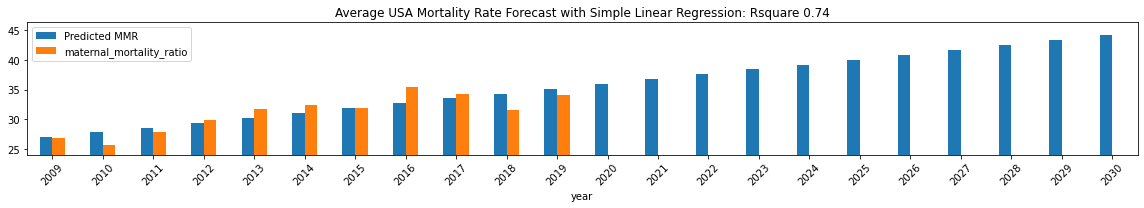

In [65]:
# Plotting maternal mortality ratio from 2009 to 2030
mmr_predictions = mmr_predictions.merge(AVG_MMR_USA.reset_index(),on='year',how='left').fillna(0)

mmr_predictions.plot(x='year',kind='bar',ylim=(24), rot=45, figsize=(16,3),\
              title=f"Average USA Mortality Rate Forecast with Simple Linear Regression: Rsquare {round(r_square,2)}")

plt.tight_layout()

# Saving future predictions plot
plt.savefig("../../static/img/Predictions_Barplot_to_2030.png")

### Selecting the Final Variables list to those which have r-square accuracy 

In [121]:
# Adding caterogircal state codes to dataframe
mmr_without_race.state_code = pd.Categorical(mmr_without_race.state_code)

# Creating a `StateCodesINT` column and adding it to the dataframe
mmr_without_race['StateCodesINT'] = mmr_without_race.state_code.cat.codes

# Defining a new name for dataframe 
df=mmr_without_race

# Selecting interesting variables 
interesting_vars = ['year', 'StateCodesINT', 'health_stat_fem_val',
 'all_determs_val',
 'all_outcomes_val',
 'dent_vis_val',
 'prem_death_ri_val',
 'dentists_val',
 'employer',
 'income_ineq_val',
 'infant_mort_val',
 'smoking_val',
 'child_pov_val',
 'chlamydia_val',
 'cancer_death_val',
 'medicare',
 'cardio_death_val',
 'obesity_val',
 'low_birthweight_val',
 'phys_inac_val',
 'prem_death_val',
 'diabetes_val',
'maternal_mortality_ratio']

In [138]:
# Setting the new correlation dataframe with interesting variables
corr_interesting_df = df[interesting_vars].corr()['maternal_mortality_ratio']

finalVars = list(corr_interesting_df[abs(corr_interesting_df)>abs(corr_interesting_df).mean()].index)


In [145]:
finalVars = list(corr_interesting_df.index)

In [146]:
finalVars

['year',
 'StateCodesINT',
 'health_stat_fem_val',
 'all_determs_val',
 'all_outcomes_val',
 'dent_vis_val',
 'prem_death_ri_val',
 'dentists_val',
 'employer',
 'income_ineq_val',
 'infant_mort_val',
 'smoking_val',
 'child_pov_val',
 'chlamydia_val',
 'cancer_death_val',
 'medicare',
 'cardio_death_val',
 'obesity_val',
 'low_birthweight_val',
 'phys_inac_val',
 'prem_death_val',
 'diabetes_val',
 'maternal_mortality_ratio']

In [147]:
X3 = df[finalVars].drop(columns='maternal_mortality_ratio')
y3 = df['maternal_mortality_ratio']

In [148]:
# Step 1: Creating a linear Regression model
model_predict = LinearRegression()

In [149]:
# Step 2: Fitting model
model_predict.fit(X3, y3)

LinearRegression()

In [150]:
# Obtaining Score values
r_sq_predict = model_predict.score(X3, y3)

print('Coefficient of Determination:', r_sq_predict)

Coefficient of Determination: 0.4348828953880046


In [151]:
# Step 3: Predicting
pred1 = model_predict.predict(X3)
print('Predicted response:', pred1, sep='\n')

Predicted response:
[45.59382529 51.26812868 52.6633545  54.15130134 54.24036987 24.88716494
 19.05585132 21.63937779 27.37325119 26.33699628 31.28282867 30.00940377
 32.4416765  33.25525868 31.44054543 39.39142801 40.99335304 40.02886807
 42.03085169 46.30201632 45.90720908 44.34217285 42.01667916 45.19728083
 38.33842019 42.51402316 22.95353249 21.85755245 20.37636884 21.25725614
 22.44966598 21.54598285 23.58892277 22.20747135 24.05429618 23.28815498
 23.94835477 23.40034254 26.60403532 27.75867153 24.37190769 27.26404232
 30.21993341 24.20110429 26.37683722 30.38371817 27.27045632 28.18787494
 29.43821645 30.52152114 31.07984724 29.6029892  31.22779976 32.25721309
 33.47904558 36.00850223 34.48512208 32.25341173 34.34950256 38.80202567
 40.19329355 41.95490327 44.84190637 41.4252765  39.85790042 39.93622808
 42.75914678 15.93231386 26.2243962  24.56291216 24.87214191 23.96980238
 25.76909909 27.44909369 29.28725657 30.72546812 31.42211685 31.82417132
 30.96333804 31.04811703 32.057

## Polynomial Regression

In [155]:
# Importing from sklearn PolynomialFeatures and Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Step 1: Creating & Setting PolynomialFeatures to degree 2 and store in Input variable
Input = [('polynomial',PolynomialFeatures(degree=2)),('model_predict',LinearRegression())]

# Passing the Input variable into the pipeline
pipe = Pipeline(Input)

# Step2: Fitting into the pipe
pipe.fit(X3, y3)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model_predict', LinearRegression())])

In [156]:
#  Step 3: Predictions 
poly_pred = pipe.predict(X3) 
poly_pred

array([19.33423247, 62.28987161, 72.38824105, 48.47846127, 57.45760552,
       21.74209014, 13.85892586, 25.37128513, 32.20908331, 23.76898913,
       19.8923701 , 32.12375676, 30.87927183, 33.96319199, 34.44555087,
       50.65537284, 37.58325155, 21.30544745, 47.02275597, 39.45859941,
       58.58534852, 41.36797056, 44.77630445, 40.49187269, 58.49371496,
       37.69259123, 12.51733997, 18.08468974, 15.32693318, 11.78150737,
       22.67840001, 18.34869263, 14.73167374, 15.74615395, 21.39360505,
       15.62839039, 21.81253985, 19.41225645, 26.1596188 , 14.27835993,
       20.7243261 , 31.8391657 , 22.37568343, 39.75360875, 32.2515843 ,
       33.46982475, 24.99219863, 20.6146371 , 33.65295245, 35.55510934,
       26.6735766 , 30.74531916, 22.5843481 , 20.77005271, 25.61807141,
       27.15776365, 21.08660421, 27.86380813, 38.09663367, 38.02012604,
       61.17327549, 82.71320809, 79.51265255, 61.08530642, 52.70456246,
       48.20441011, 52.03533132, 45.92910684, 25.57573226, 14.36

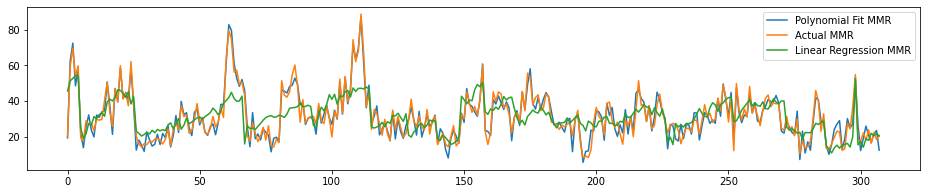

In [157]:
# Plotting the Polynomial Features Predictions
plt.figure(figsize=(16,3))
plt.plot(poly_pred,label="Polynomial Fit MMR")
plt.plot(y,label="Actual MMR")
plt.plot(pred1,label="Linear Regression MMR")
plt.legend()

### Saving the Model

In [158]:
# Saving the model with `joblib`
import joblib 

filename = '../models/LR_model2_Chahnaz.sav'
joblib.dump(reg_model, filename)

['../models/LR_model2_Chahnaz.sav']